<a href="https://colab.research.google.com/github/VaibhavKapil1819/ml-daily-notes/blob/main/splittingdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris(as_frame=True)
X = iris_data.data
y = iris_data.target

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
import matplotlib.pyplot as plt


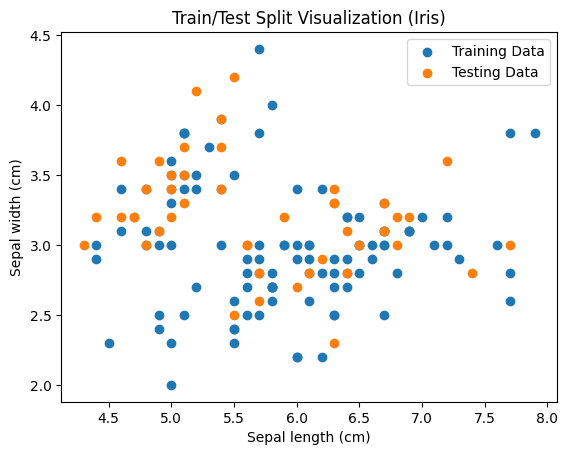

In [ ]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], label='Training Data')
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], label='Testing Data')
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Train/Test Split Visualization (Iris)")
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

# Fake time series data
X = np.arange(10).reshape(-1, 1)   # features = numbers 0..9
y = np.arange(10)                  # targets = 0..9

# 3 splits
tscv = TimeSeriesSplit(n_splits=3)

for i, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    print(f"Fold {i}")
    print("Train indices:", train_idx)
    print("Test indices:", test_idx)
    print()


Fold 1
Train indices: [0 1 2 3]
Test indices: [4 5]

Fold 2
Train indices: [0 1 2 3 4 5]
Test indices: [6 7]

Fold 3
Train indices: [0 1 2 3 4 5 6 7]
Test indices: [8 9]



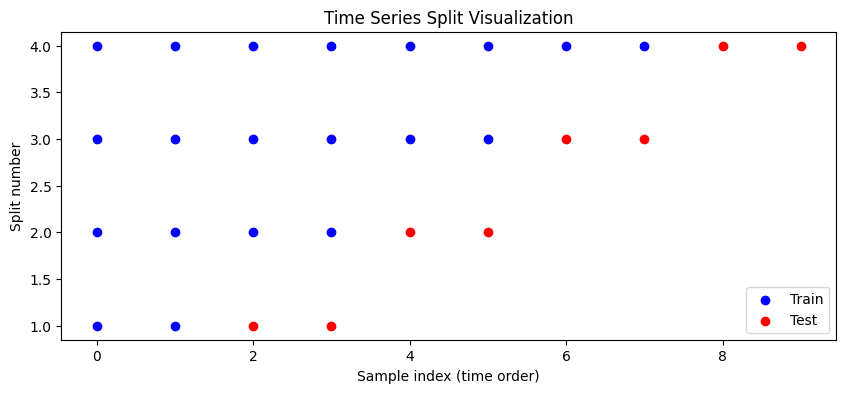

In [ ]:
import matplotlib.pyplot as plt

tscv = TimeSeriesSplit(n_splits=4)

plt.figure(figsize=(10,4))

for i, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    plt.scatter(train_idx, [i]*len(train_idx), c="blue", label="Train" if i==1 else "")
    plt.scatter(test_idx, [i]*len(test_idx), c="red", label="Test" if i==1 else "")

plt.xlabel("Sample index (time order)")
plt.ylabel("Split number")
plt.title("Time Series Split Visualization")
plt.legend()
plt.show()


# **PREPROCESSING**

Preprocessing is needed to clean and prepare raw data, improve model performance by scaling and formatting data, convert data types for model compatibility, and reduce dimensionality to prevent overfitting and reduce computational cost.


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
X,y = load_iris(return_X_y=True)

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler(): This line creates an instance of the StandardScaler class. The StandardScaler works by removing the mean and scaling the data to unit variance. This results in data with a mean of 0 and a standard deviation of 1.
X_train_scaled = scaler.fit_transform(X_train): This line applies the scaling to your training data (X_train).
fit() calculates the mean and standard deviation of the features in X_train.
transform() then applies the calculated mean and standard deviation to scale the X_train data. The scaled data is stored in X_train_scaled.
X_test_scaled = scaler.transform(X_test): This line scales your testing data (X_test) using the same mean and standard deviation that were calculated from the training data. It's crucial to use the parameters learned from the training data to avoid data leakage from the testing set into the training process. The scaled testing data is stored in X_test_scaled.
Standard scaling is a common preprocessing step, especially for algorithms that are sensitive to the scale of input features, such as Support Vector Machines (SVMs) and K-Nearest Neighbors (KNN).


In [7]:
X_train_scaled

array([[-0.10419941, -0.53983534,  0.23227654,  0.18303485],
       [ 0.13859534, -0.07379044,  0.80111703,  0.84460662],
       [-0.46839154,  1.5573667 , -1.24670875, -1.27242303],
       [ 0.86697958,  0.39225446,  0.80111703,  1.10923532],
       [ 0.62418483, -1.23890268,  0.74423298,  0.97692097],
       [ 1.10977433,  0.6252769 ,  1.14242133,  1.24154968],
       [ 1.95955596, -0.53983534,  1.36995752,  0.97692097],
       [ 0.62418483, -1.70494758,  0.40292868,  0.18303485],
       [ 1.83815858, -0.30681289,  1.48372562,  0.84460662],
       [ 1.23117171, -0.07379044,  1.02865323,  1.24154968],
       [ 0.38139009, -1.00588024,  1.08553728,  0.31534921],
       [-0.83258366,  1.79038915, -1.1898247 , -1.27242303],
       [ 0.62418483,  0.85829935,  1.08553728,  1.63849273],
       [ 1.47396646,  0.39225446,  0.57358083,  0.31534921],
       [ 1.10977433, -0.07379044,  0.85800108,  1.50617838],
       [ 0.25999271,  0.85829935,  0.45981273,  0.57997791],
       [-0.10419941, -1.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)